In [47]:
from importlib import reload
import numpy as np
import os
from scipy.sparse import csc_matrix, csr_matrix
import pickle
import pretty_midi
import sys
import copy
from collections import namedtuple
import timeit
import tensorflow as tf

In [2]:
# import modules, including a reload statement so that they can be reimported after a change to the methods 
import src.midi_utils as midi_utils
reload(midi_utils)

import src.data as data
reload(data)

import src.models as models
reload(models)

import src.ml_classes as ml_classes
reload(ml_classes)

<module 'src.ml_classes' from 'C:\\Users\\Andrew\\Documents\\mlprojects\\781-piano-autoencoder\\src\\ml_classes.py'>

In [52]:
for file in os.scandir('src'):
    print(file.path.split(['\\','.'])[-1])

TypeError: must be str or None, not list

In [6]:
# with open('without_tempo.mid') as f:
pm = pretty_midi.PrettyMIDI('training_data/aa_97_Cm_a.mid')

In [3]:
# print(pm.get_beats()[-1])
# print(sub_beat_times)
a = csc_matrix(np.array([[1,0,0],[0,0,0],[0,3,0]]))
a.getrow(1).toarray()
a.toarray()

array([[1, 0, 0],
       [0, 0, 0],
       [0, 3, 0]], dtype=int32)

In [11]:
isinstance(a, csc_matrix)

True

In [41]:
# two ways of transposing if they are integers indicating pitch, but dimensions are unknown
int_transpose = np.vectorize(lambda x: min(max(x + semitones, 0), 87))
def int_transpose1():
    semitones = 2
    b = np.array([[1,2,3],[3,4,5]])
    b = int_transpose(b)

# or like this:
def int_transpose2():
    semitones = 2
    b = np.array([[1,2,3],[3,4,5]])
    for idx,value in np.ndenumerate(b):
        b[idx] = min(max(value + semitones, 0), 87)
    
print(timeit.timeit(int_transpose1, number=10000))
print(timeit.timeit(int_transpose2, number=10000))

0.26732860000265646
0.14455119999911403


In [128]:
c = np.zeros((3,3))
c[1] = [1,1,1]
print(c)

[[0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]


In [121]:
print(a.data)
print(a.indices)

[1 3]
[0 2]


In [94]:
dir(a)

['__abs__',
 '__add__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmatmul__',
 '__rmul__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_add_dense',
 '_add_sparse',
 '_arg_min_or_max',
 '_arg_min_or_max_axis',
 '_binopt',
 '_boolean_index_to_array',
 '_check_boolean',
 '_check_ellipsis',
 '_cs_matrix__get_has_canonical_format',
 '_cs_matrix__get_sorted',
 '_cs_matrix_

In [120]:
a.indptr

array([0, 1, 2, 2], dtype=int32)

In [43]:
a = np.array([[1,2,3],[2,3,4]])
for i in a:
    print(i)

[1 2 3]
[2 3 4]


In [112]:
with open('H2', 'wb') as f:
    pickle.dump(H, f)

In [72]:
# and back to pretty midi...
def H2pm(H, O, V, tempo, sub_beat_times):
    beat_length = 60 / tempo
    sub_beat_length = beat_length / sub_beats
    pm = pretty_midi.PrettyMIDI(resolution=960, tempo=tempo)
    pm.instruments.append(pretty_midi.Instrument(0, name='piano'))
    for timestep in range(len(H)):
        for pitch in H(timestep):
            noteM = pretty_midi.Note(64, pitch + 21, sub_beat_times[timestep], end)
            pm.instruments[0].notes.append(noteM)

In [98]:
m = np.zeros((64,88))
sys.getsizeof(m)/1024/1024 * 5*60*10 # 5 training examplems per minute

129.2266845703125

In [105]:
sys.getsizeof(H)/1024/1024 * 5*60*10 # 5 training examplems per minute

0.54931640625

In [120]:
sys.getsizeof(np.zeros((3,128,64,88), dtype=np.int64))/1024

16896.140625

In [ ]:
pm2.get_onsets()

In [ ]:
pm2.get_downbeats()[-20:]

In [89]:
main_input, extra_inputs, extra_inputs_expanded = models.create_inputs()
z = models.create_LSTMencoder(main_input, extra_inputs_expanded)
H, O, V = models.create_LSTMdecoder(z)
model = tf.keras.Model(inputs=[main_input] + extra_inputs, outputs=[H,O,V], name=f'autoencoder')
model.summary()

Model: "autoencoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
key (InputLayer)                [(None, 1)]          0                                            
__________________________________________________________________________________________________
tempo (InputLayer)              [(None, 1)]          0                                            
__________________________________________________________________________________________________
makeOneHot (Lambda)             (None, 12)           0           key[0][0]                        
__________________________________________________________________________________________________
mainInput (InputLayer)          [(None, 32, 88)]     0                                            
________________________________________________________________________________________

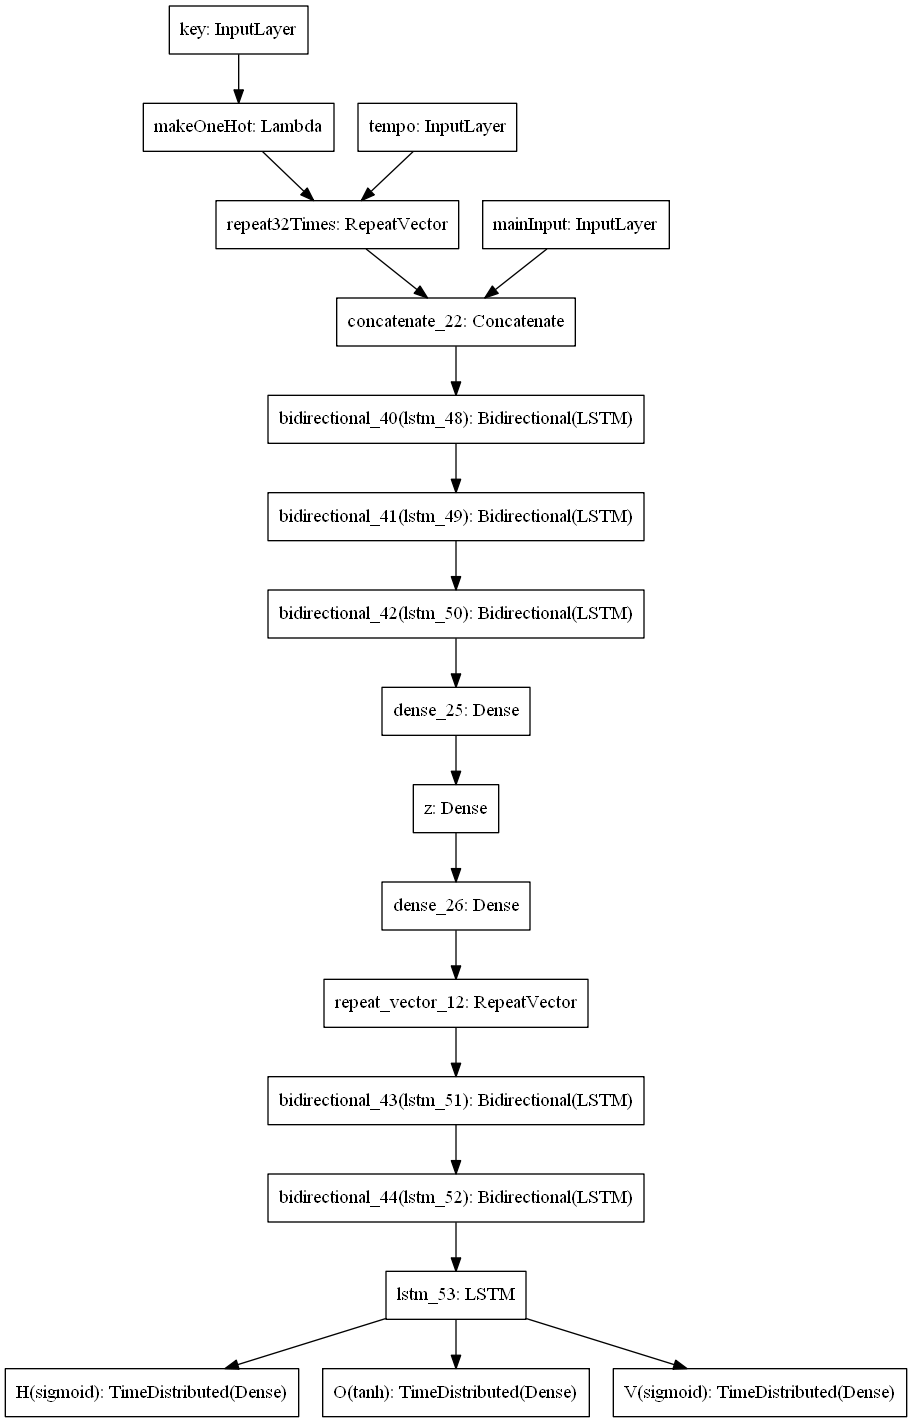

In [90]:
tf.keras.utils.plot_model(model)

In [167]:
reload(tf.keras.utils)

<module 'tensorflow.keras.utils' from 'C:\\Users\\Andrew\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\utils\\__init__.py'>